<a href="https://colab.research.google.com/github/shirishbahirat/artificial-intelligence/blob/master/Deep_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!git clone https://github.com/Dataweekends/zero_to_deep_learning_video.git

In [0]:
!cp -r zero_to_deep_learning_video/data ./

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

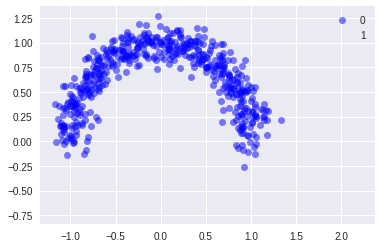

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [5]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [12]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 125us/step


In [13]:
results

[0.3168264998992284, 0.8366666674613953]

In [14]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.837


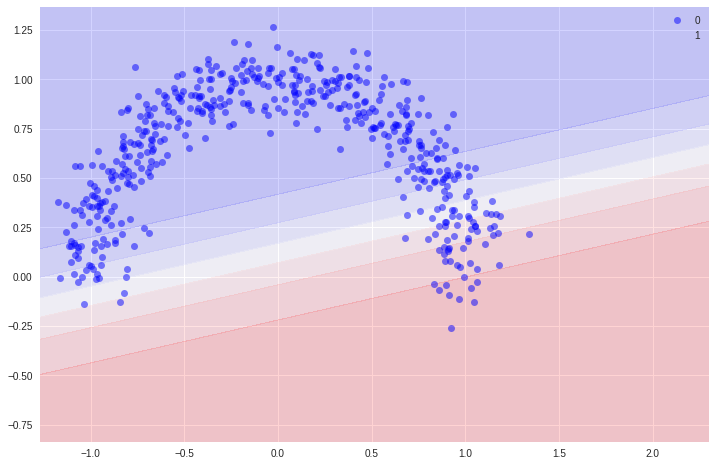

In [15]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

In [0]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 204us/step


[0.0025919910757026326, 1.0]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


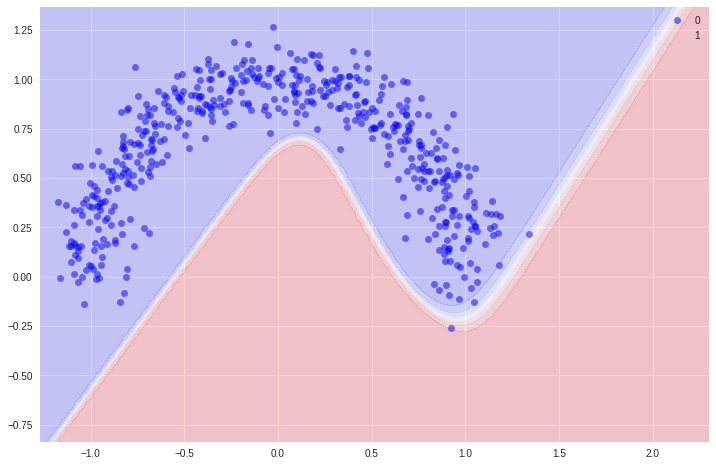

In [21]:
plot_decision_boundary(model, X, y)

# Multiclass classification

In [0]:
df = pd.read_csv('./data/iris.csv')

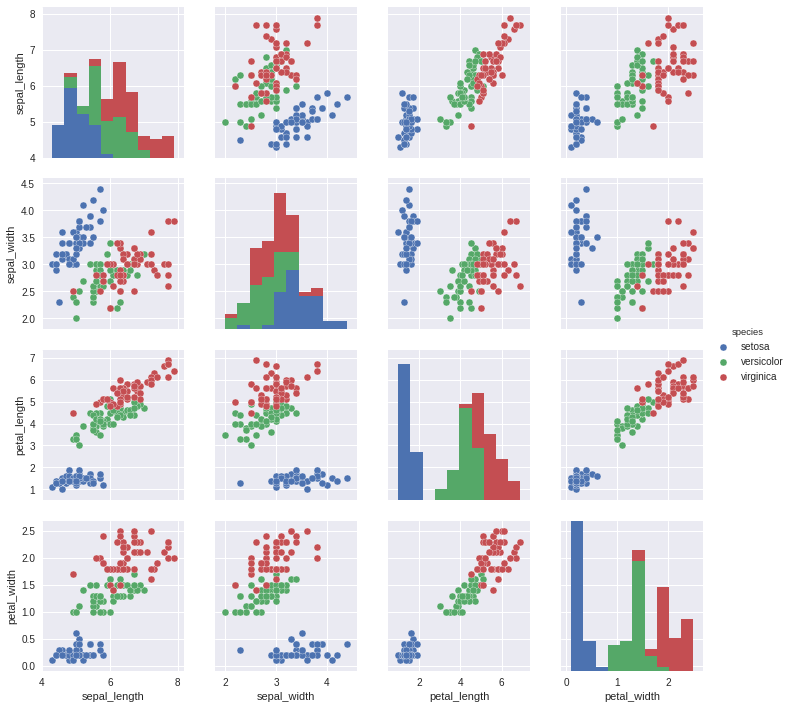

In [23]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [28]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat = to_categorical(y)

In [31]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 2ms/step - loss: 2.1252 - acc: 0.2963 - val_loss: 1.1932 - val_acc: 0.5000
Epoch 2/20
108/108 [==============================] - 0s 85us/step - loss: 1.3021 - acc: 0.3704 - val_loss: 0.9743 - val_acc: 0.5000
Epoch 3/20
108/108 [==============================] - 0s 62us/step - loss: 0.9670 - acc: 0.6759 - val_loss: 1.2251 - val_acc: 0.5000
Epoch 4/20
108/108 [==============================] - 0s 89us/step - loss: 0.6248 - acc: 0.7315 - val_loss: 0.7221 - val_acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 77us/step - loss: 0.7756 - acc: 0.6667 - val_loss: 0.5245 - val_acc: 0.7500
Epoch 6/20
108/108 [==============================] - 0s 97us/step - loss: 0.4959 - acc: 0.7500 - val_loss: 0.9439 - val_acc: 0.5000
Epoch 7/20
108/108 [==============================] - 0s 52us/step - loss: 0.5229 - acc: 0.6759 - val_loss: 0.4902 - val_acc: 1.0000
Epoch 8/20
108/108 [=====

In [0]:
y_pred = model.predict(X_test)

In [36]:
y_pred[:5]

array([[1.4922937e-04, 1.4917895e-01, 8.5067189e-01],
       [7.4866635e-04, 3.0896941e-01, 6.9028193e-01],
       [3.5638608e-05, 5.5179000e-02, 9.4478542e-01],
       [9.8306155e-01, 1.6853418e-02, 8.4997730e-05],
       [3.4836828e-04, 1.8126479e-01, 8.1838691e-01]], dtype=float32)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [40]:
confusion_matrix(y_test_class, y_pred_class)

array([[11,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 10]])